# Global sensitivity analysis using the Sobol method

In [11]:
#imports
%matplotlib inline
import pandas as pd
import numpy as np
from SALib.analyze import sobol
import plot
import matplotlib.pyplot as plt

Read in the data and create the output variables

In [6]:
# read the data
data = pd.read_csv('../Data/batchrun01-02-2018.csv')

# create output variables
data['total'] = np.round(data['N'] // 2) + np.round((data['N'] // 2) * data['ratio']) + data['N'] - np.round(data['N'] // 2) - np.round(
    (data['N'] // 2) * data['ratio'])
data['pfl_net'] = (data['pheromone'] - data['followers'] - data['leaders']) / data['total']
data['pu_net'] = (data['pheromone'] - data['unassigned']) / data['total']
data['flu_net'] = (data['followers'] + data['leaders'] - data['unassigned']) / data['total']
params = ['p_uf', 'p_pu', 'p_up', 'p_fl', 'p_lu', 'g', 'ratio', 'N', 'size']

Compute the first order, second order, and total order sensitivity indices using the Sobol method. By changing the 'output' variable different output variables can be tested. The naming scheme is:

- 'pfl-net' : (pheromoners - followers - leaders)/total
- 'pu-net' : (pheromoners - unassigned)/total
- 'flu-net' : (followers + leaders - unassigned)/total

In [7]:
problem = {
    'num_vars': 9,
    'names': params,
    'bounds': [[0, 1]] * 5 + [[0, 0.5]] + [[0, 1]] + [[10, 200]] + [[3, 20]]
}
output = 'pfl_net'
Si = sobol.analyze(problem, data[output].as_matrix(), print_to_console=True)

Parameter S1 S1_conf ST ST_conf
p_uf 0.003066 0.016424 0.094790 0.016171
p_pu 0.336425 0.043559 0.674579 0.037449
p_up 0.224872 0.040513 0.583114 0.032882
p_fl 0.007505 0.016755 0.104576 0.017486
p_lu 0.023506 0.022055 0.145052 0.025352
g 0.010670 0.016581 0.088463 0.016242
ratio 0.018206 0.021699 0.141046 0.021272
N 0.009737 0.017811 0.115011 0.017854
size -0.002448 0.015506 0.089094 0.018466

Parameter_1 Parameter_2 S2 S2_conf
p_uf p_pu -0.003043 0.023914
p_uf p_up -0.016473 0.023194
p_uf p_fl -0.012329 0.023091
p_uf p_lu -0.008256 0.022199
p_uf g -0.007199 0.023883
p_uf ratio -0.004507 0.023713
p_uf N -0.007473 0.024421
p_uf size -0.006660 0.023552
p_pu p_up 0.198844 0.047645
p_pu p_fl 0.001598 0.045711
p_pu p_lu -0.001075 0.046688
p_pu g -0.007083 0.046452
p_pu ratio 0.005705 0.048228
p_pu N 0.000125 0.045184
p_pu size 0.008577 0.045917
p_up p_fl 0.003178 0.054243
p_up p_lu 0.019730 0.050325
p_up g 0.014099 0.052883
p_up ratio 0.013853 0.051035
p_up N 0.016379 0.050941
p_up size 0.

Plotting it gives more insight:

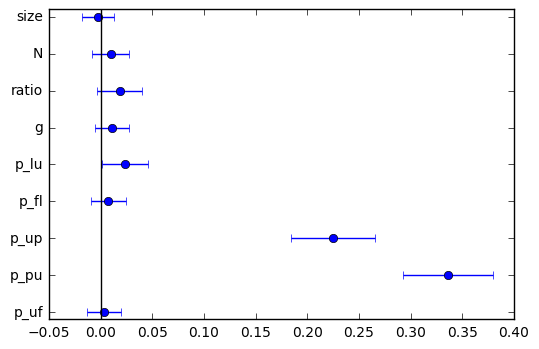

In [13]:
# First order
plot.plot_index(Si, params, '1')
plt.show()

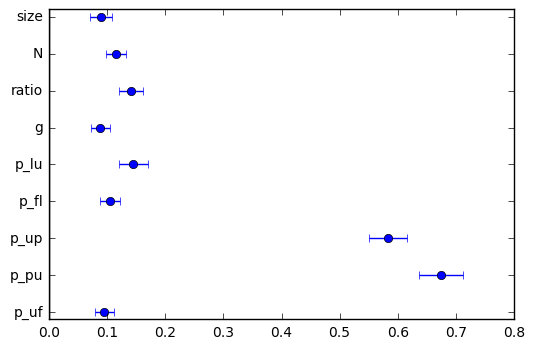

In [14]:
# Total order
plot.plot_index(Si, params, 'T')
plt.show()